## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [46]:
df = pd.read_csv('ab_data.csv')

In [40]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [41]:
df.shape[0] # number of rows

294478

c. The number of unique users in the dataset.

In [21]:
df.user_id.nunique() # number of unique users

290584

d. The proportion of users converted.

In [22]:
df[df.converted == 1].shape[0] / df.shape[0] # proportion of converted users

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [23]:
# number of times when a 'treatment' is given an 'old_page' and a 'control' given a 'new_page'
df.query('(group == "treatment" and landing_page == "old_page") \
            or (group == "control" and landing_page == "new_page")').shape[0]

3893

f. Do any of the rows have missing values?

In [42]:
df.isnull().sum().sum() # sum all null values

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
df2 = df.drop(index=df.query('(group == "treatment" and landing_page == "old_page") \
            or (group == "control" and landing_page == "new_page")').index)

In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [52]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat user_id?

In [57]:
df2[df2[['user_id']].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
df2.drop(index=2893, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [206]:
p_converted = df2[df2.converted == 1].shape[0] / df2.shape[0]
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [105]:
df_control = df2.query('group == "control"')
p_old_orig = df_control[df_control.converted == 1].shape[0] / df_control.shape[0]
p_old_orig

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [104]:
df_treatment = df2.query('group == "treatment"')
p_new_orig = df_treatment[df_treatment.converted == 1].shape[0] / df_treatment.shape[0]
p_new_orig

0.11880806551510564

d. What is the probability that an individual received the new page?

In [65]:
df2[df2.landing_page == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, we don't have enough evidence to say whether the new page leads to more conversions (or less conversions for that matter). The main reason for this is that this question falls into the domain of inferential statistics and we don't know main statistical characteristics of given sample to make conclusions about population this sample represents.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: $p_{old} >= p_{new}$

$H_{A}$: $p_{old} < p_{new}$

$\alpha$ = 0.05

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

b. What is the **convert rate** for $p_{old}$ under the null?

In [207]:
p_new = p_old = p_converted
p_new, p_old

(0.11959708724499628, 0.11959708724499628)

c. What is $n_{new}$?

In [157]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [158]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [208]:
new_page_converted = np.array(np.random.binomial(1, p_new, n_new))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [209]:
old_page_converted = np.array(np.random.binomial(1, p_old, n_old))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [210]:
(new_page_converted == 1).sum() / new_page_converted.shape[0] - \
(old_page_converted == 1).sum() / old_page_converted.shape[0]

-0.00080994497326696

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [211]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.array(np.random.binomial(1, p_new, n_new))
    old_page_converted = np.array(np.random.binomial(1, p_old, n_old))
    p_diffs.append((new_page_converted == 1).sum() / new_page_converted.shape[0] - \
                   (old_page_converted == 1).sum() / old_page_converted.shape[0])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

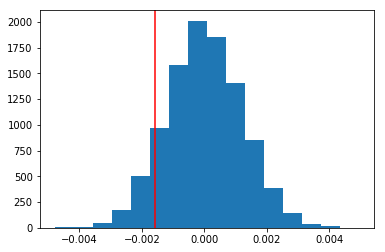

In [212]:
plt.hist(p_diffs, bins=16); # plot the p_diffs
plt.axvline(p_new_orig - p_old_orig, color = 'red'); # plot the value of the difference in original p_new and p_old

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [213]:
p_diffs = np.array(p_diffs)
(p_diffs > p_new_orig - p_old_orig).mean()

0.9039

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We've just calculated **p-value** for a distribution of differences in conversion between `control` and `treatment` groups of users. p-value of 0.9039 indicates that null hypothesis (which was $H_{0}: p_{new} - p_{old} <= 0$) can not be rejected as it is way bigger than our $\alpha$ value of 0.05. In other words there's a ~90% chance the any observed difference between $p_{new}$ and $p_{old}$ can be attributed to both statistics belonging to the same distribution.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [173]:
import statsmodels.api as sm

df_control = df2.query('landing_page == "new_page"')
df_treatment = df2.query('landing_page == "old_page"')

convert_old = df_control[df_control.converted == 1].shape[0] 
convert_new = df_treatment[df_treatment.converted == 1].shape[0]
n_old = df_control.shape[0]
n_new = df_treatment.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [216]:
# here, we make a two-sample z-test with p[0] as old, p[1] as new, null hypothesis as 0
# and the one-sided alternative hypothesis p[1] 'larger' that p[0]
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], 0, alternative='larger')
'{0:0.3f}'.format(stat), '{0:0.3f}'.format(pval)

('-1.311', '0.905')

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score** is a number of standard deviations of a distribution and is directly related to **p-value**. It designates the point on X axis of a normal distribution of a statistics under null hypothesis on which the observed difference in tested proportions falls. p-value still means the same - whether the null hypothesis about the difference in proportions under test being equal or less than 0 can be rejected or not under defined type I error threshold which is 0.05. In given case p-value is 0.9 and hence, the null hypothesis can not be rejected.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

These are proper conditions to use logistic regression as the dependent variable is binary.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [178]:
df2['intercept'] = 1
# get_dummies returns new dataframe with 'treatment' and 'control' columns
# of which we can choose the one that fits the requirements
# as they are the inverse of each other
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [202]:
sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:41:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p-value** equals to 0.19 and is different to one calculated in **Part II** of the exercise. This is explained by difference in __what__ was actually computed. **p-value** in **Part II** designates the chance of observed differences in statistics belonging to the distribution under null hypothesis, i.e. if there's a statistically significant difference between old and new conversion rates regardless of factors that affect the conversion. The **p-value** calculated here designates statistical significance of a relationship between a factor (a page served to a user) and a dependent variable, the conversion rate. Hence, the null hypothesis in this case is that the page has no effect on conversion while the alternative is that it has a positive or a negative effect (two-sided test). Given the calculated **p-value** the null hypothesis can not be rejected.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The statistics collected is pretty big to yield statistically significant results so the time component of A/B test is right. There are multiple other factors that can influence conversions alongside the page contents itself like gender, nationality, laguage, age, socio-economics status, exposure to marketing campains by the Company, etc. It's not clear how diverse the statistics is and how representative it is of targeted population in regards to aforementioned factors. The main issue with throwing more terms into the mix is that the terms can be interdependent and thus our neat linear model turns into multilinear model which is way harder to analyse.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [191]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [192]:
df_new = df_new.join(pd.get_dummies(df_new['country']))

In [200]:
sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 17 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        11:38:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

Looking at resulting **p-values** they are still too big to tell that the country of the user has any effect on the conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [203]:
sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:45:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

Yet again, combining the country and the page does not yield low enough **p-values** which indicates statistically insignificant relationships with conversion and thus they have no effect on conversion rates.